In [1]:
#Importando bibliotecas
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sys.path.append(os.path.abspath(os.path.join('modulos')))
from modulo01 import *
from modulo02 import *
from modulo03 import *

In [3]:
pd.set_option('display.max_columns', None)

In [5]:
df_original = pd.read_csv("carclaims.csv")
df_original.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [6]:
df_clean = df_original.copy()

In [7]:
#Usando função do módulo para verificar se há dados ausentes
df_missing = func_calc_percentual_valores_ausentes_coluna(df_clean)

O dataset tem 33 colunas.
Encontrado: 0 colunas que têm valores ausentes.


In [20]:
df_missing

In [14]:
df_clean.shape

(15420, 33)

In [12]:
#Não há dados ausentes. Vamos verificar se os campos possuem valores válidos
df_clean['Age'].value_counts()

30    596
33    574
34    573
35    569
28    560
     ... 
20     28
70     27
79     20
16      9
17      6
Name: Age, Length: 66, dtype: int64

In [13]:
#Nos eua, a idade mínima para dirigir é 16. Verificando se há menores na tabela
df_menor = df_clean.loc[df_clean['Age'] < 16]
df_menor

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,0,Policy Holder,Sport - Collision,Sport,"more than 69,000",8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
13,Jan,5,Friday,Honda,Rural,Wednesday,Feb,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,"more than 69,000",14,12,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",29,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,Yes
31,Mar,1,Sunday,Honda,Urban,Tuesday,Mar,2,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,"more than 69,000",32,6,400,1,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
58,May,1,Monday,Honda,Rural,Wednesday,May,4,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",59,15,400,4,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Liability,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15243,May,2,Tuesday,Honda,Urban,Monday,May,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",15244,7,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability,No
15262,Mar,3,Monday,Honda,Urban,Thursday,Mar,3,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",15263,5,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability,No
15274,Apr,3,Monday,Honda,Urban,Tuesday,May,1,Male,Single,0,Third Party,Sedan - Collision,Sedan,"more than 69,000",15275,1,400,2,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision,No
15379,Jan,2,Tuesday,Honda,Urban,Thursday,Jan,2,Male,Single,0,Policy Holder,Utility - All Perils,Utility,"more than 69,000",15380,1,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,1 year,1 vehicle,1996,All Perils,No


In [16]:
#Há 320 registros apontando valores menores que 16
df_menor.tail(50)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
12872,Dec,4,Friday,Honda,Rural,Tuesday,Dec,4,Male,Single,0,Third Party,Sedan - All Perils,Sedan,"more than 69,000",12873,10,400,1,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,All Perils,No
13183,Jun,2,Friday,Honda,Urban,Wednesday,Jun,4,Male,Single,0,Third Party,Sedan - All Perils,Sedan,"more than 69,000",13184,16,400,4,more than 30,more than 30,2 to 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,All Perils,No
13319,Jul,1,Saturday,Honda,Urban,Tuesday,Jan,1,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",13320,6,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,All Perils,No
13399,Apr,4,Monday,Honda,Urban,Tuesday,May,1,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,"more than 69,000",13400,16,400,4,more than 30,more than 30,2 to 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision,No
13419,Sep,4,Monday,Honda,Urban,Monday,Sep,4,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",13420,7,400,3,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,4 to 8 years,2 vehicles,1996,All Perils,No
13489,Mar,2,Wednesday,Honda,Rural,Monday,Apr,3,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,"more than 69,000",13490,15,400,2,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,3 to 4,1996,Collision,No
13553,Dec,2,Wednesday,Honda,Urban,Thursday,Dec,3,Male,Single,0,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",13554,9,400,4,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,All Perils,No
13557,Apr,2,Monday,Honda,Urban,Tuesday,Apr,2,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",13558,8,400,1,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability,No
13610,Feb,2,Wednesday,Honda,Urban,Wednesday,Feb,2,Male,Single,0,Policy Holder,Sedan - Liability,Sport,"more than 69,000",13611,9,400,1,more than 30,more than 30,more than 4,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Liability,No
13675,Aug,3,Thursday,Honda,Urban,Tuesday,Aug,4,Male,Single,0,Policy Holder,Sedan - Collision,Sedan,"more than 69,000",13676,6,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1996,Collision,No


In [19]:
#Todos os valores abaixo de 16 são zero
df_menor['Age'].median()

0.0

In [22]:
#Analisando dados estatísticos da coluna age
df_clean['Age'].describe()

count    15420.000000
mean        39.855707
std         13.492377
min          0.000000
25%         31.000000
50%         38.000000
75%         48.000000
max         80.000000
Name: Age, dtype: float64

In [23]:
#A coluna AgeOfPolicyHolder pode auxiliar na identifação da idade nos registros que apontam idade 0, vamos ver:
df_menor['AgeOfPolicyHolder'].value_counts()

16 to 17    320
Name: AgeOfPolicyHolder, dtype: int64

In [24]:
df_menor['FraudFound'].value_counts()

No     289
Yes     31
Name: FraudFound, dtype: int64

In [25]:
#Todos os registros com o valor 16 to 17 estão idade zero. Por isso, vou substituir os zero por 16
df_clean['AgeOfPolicyHolder'].value_counts()

31 to 35    5593
36 to 40    4043
41 to 50    2828
51 to 65    1392
26 to 30     613
over 65      508
16 to 17     320
21 to 25     108
18 to 20      15
Name: AgeOfPolicyHolder, dtype: int64

In [27]:
df_clean['Age'] = np.where(df_clean['Age'] == 0, 16, df_clean['Age'])

In [50]:
#Verificando valores válidos na coluna de mês.
df_clean['MonthClaimed'].value_counts()

Jan    1446
May    1411
Mar    1348
Oct    1339
Jun    1293
Feb    1287
Nov    1285
Apr    1271
Sep    1242
Jul    1225
Dec    1146
Aug    1126
0         1
Name: MonthClaimed, dtype: int64

In [51]:
#Aplicando moda para o valor inválido
df_clean['MonthClaimed'] = np.where(df_clean['MonthClaimed'] == '0', 'Jan', df_clean['MonthClaimed'])

In [52]:
#Confirmando que coluna foi tratada
df_menor = df_clean.loc[df_clean['Age'] < 16]
df_menor

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound


In [53]:
df_clean['FraudFound'].value_counts()

No     14497
Yes      923
Name: FraudFound, dtype: int64

In [54]:
#Agora, vamos fatiar o dataset com a variável alvo FraudFound
df_fraud = df_clean.loc[df_clean['FraudFound'] == 'Yes']
df_fraud

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,16,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",29,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,Yes
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,21,Policy Holder,Sport - Collision,Sport,"more than 69,000",53,4,400,4,more than 30,more than 30,none,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,Yes
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,50,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",54,13,400,1,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,Yes
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",95,7,400,3,more than 30,more than 30,none,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,Yes
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,38,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",97,7,400,2,more than 30,more than 30,1,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15409,Nov,3,Friday,Mazda,Urban,Sunday,Nov,3,Female,Married,65,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15410,7,400,3,more than 30,more than 30,more than 4,7 years,51 to 65,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes
15412,Nov,4,Tuesday,Pontiac,Urban,Wednesday,Nov,4,Female,Single,28,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",15413,5,400,4,more than 30,more than 30,more than 4,5 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,Liability,Yes
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision,Yes
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision,Yes


In [55]:
df_nofraud = df_clean.loc[df_clean['FraudFound'] == 'No']
df_nofraud

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,Nov,4,Tuesday,Honda,Rural,Wednesday,Nov,5,Male,Married,42,Third Party,Sedan - All Perils,Sedan,"less than 20,000",15412,1,400,1,more than 30,more than 30,1,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1996,All Perils,No
15413,Nov,4,Thursday,Mazda,Urban,Monday,Nov,4,Male,Married,40,Policy Holder,Sedan - Liability,Sport,"20,000 to 29,000",15414,9,400,2,more than 30,more than 30,1,7 years,36 to 40,Yes,No,External,1 to 2,no change,1 vehicle,1996,Liability,No
15414,Nov,4,Friday,Chevrolet,Urban,Monday,Nov,4,Male,Single,58,Third Party,Sedan - Collision,Sedan,"30,000 to 39,000",15415,3,400,4,more than 30,more than 30,none,7 years,51 to 65,No,No,External,1 to 2,4 to 8 years,2 vehicles,1996,Collision,No
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,"30,000 to 39,000",15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability,No


In [56]:
#Confirmando os tipos de cada coluna
df_fraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 923 entries, 28 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 923 non-null    object
 1   WeekOfMonth           923 non-null    int64 
 2   DayOfWeek             923 non-null    object
 3   Make                  923 non-null    object
 4   AccidentArea          923 non-null    object
 5   DayOfWeekClaimed      923 non-null    object
 6   MonthClaimed          923 non-null    object
 7   WeekOfMonthClaimed    923 non-null    int64 
 8   Sex                   923 non-null    object
 9   MaritalStatus         923 non-null    object
 10  Age                   923 non-null    int64 
 11  Fault                 923 non-null    object
 12  PolicyType            923 non-null    object
 13  VehicleCategory       923 non-null    object
 14  VehiclePrice          923 non-null    object
 15  PolicyNumber          923 non-null   

In [57]:
df_fraud.head(50)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
28,Jul,1,Saturday,Honda,Urban,Tuesday,Sep,4,Male,Single,16,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",29,9,400,1,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,Yes
52,Jul,3,Sunday,Honda,Rural,Wednesday,Jan,4,Male,Married,21,Policy Holder,Sport - Collision,Sport,"more than 69,000",53,4,400,4,more than 30,more than 30,none,4 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,Yes
53,Jul,4,Saturday,Honda,Urban,Wednesday,Aug,2,Male,Married,50,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",54,13,400,1,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,Yes
94,Nov,2,Thursday,Honda,Urban,Friday,Jan,3,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",95,7,400,3,more than 30,more than 30,none,7 years,31 to 35,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,Yes
96,Nov,2,Friday,Toyota,Urban,Tuesday,Jan,1,Male,Married,38,Policy Holder,Sedan - Collision,Sedan,"20,000 to 29,000",97,7,400,2,more than 30,more than 30,1,7 years,36 to 40,No,No,External,none,no change,1 vehicle,1994,Collision,Yes
100,Nov,3,Tuesday,Chevrolet,Urban,Wednesday,Jan,2,Male,Married,31,Policy Holder,Utility - All Perils,Utility,"more than 69,000",101,2,400,1,more than 30,more than 30,more than 4,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1994,All Perils,Yes
113,Nov,4,Thursday,Accura,Rural,Tuesday,Jan,2,Male,Married,56,Policy Holder,Utility - All Perils,Utility,"more than 69,000",114,10,400,2,more than 30,more than 30,none,more than 7,51 to 65,No,No,External,none,no change,1 vehicle,1994,All Perils,Yes
118,Nov,5,Monday,Mazda,Urban,Wednesday,Dec,1,Male,Single,68,Policy Holder,Sedan - All Perils,Sedan,"20,000 to 29,000",119,9,400,3,more than 30,more than 30,2 to 4,5 years,over 65,No,No,External,none,no change,1 vehicle,1994,All Perils,Yes
119,Dec,1,Friday,Honda,Rural,Friday,Dec,3,Male,Single,16,Policy Holder,Sedan - All Perils,Sedan,"more than 69,000",120,7,400,3,more than 30,more than 30,none,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,All Perils,Yes
147,Dec,1,Monday,Toyota,Rural,Tuesday,May,3,Male,Married,39,Policy Holder,Sedan - All Perils,Sedan,"30,000 to 39,000",148,1,400,3,more than 30,more than 30,none,more than 7,36 to 40,No,No,External,more than 5,under 6 months,2 vehicles,1994,All Perils,Yes


In [58]:
df_fraud['Sex'].value_counts()

Male      818
Female    105
Name: Sex, dtype: int64

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

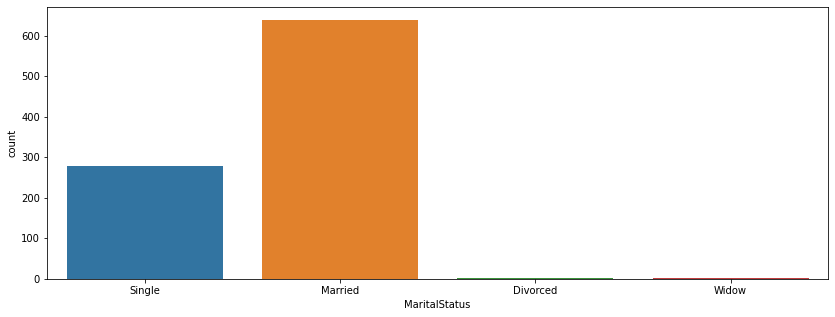

In [59]:
#Buscando relação de status de relacionamento. Fatiando entre fraudes e não, não há relação visível
plt.figure(figsize = (14,5))
sns.countplot(x=df_fraud['MaritalStatus'], data=df_fraud)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

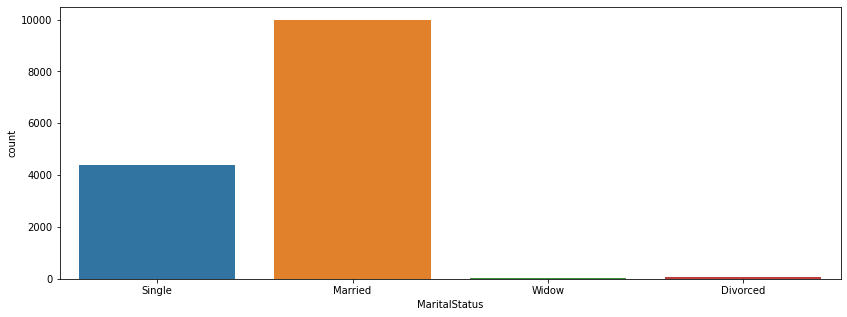

In [60]:
plt.figure(figsize = (14,5))
sns.countplot(x=df_nofraud['MaritalStatus'], data=df_nofraud)

<AxesSubplot:title={'center':'Relação de Preço dos Veículos com Casos de Fraude'}, xlabel='VehiclePrice', ylabel='count'>

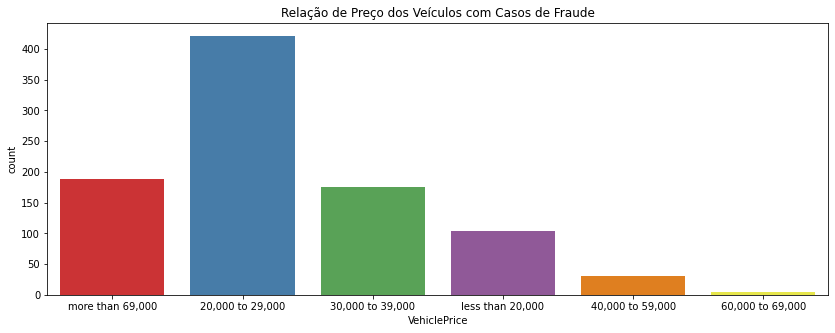

In [61]:
#Relação entre preço do veículo e fraude
plt.figure(figsize = (14,5))
plt.title("Relação de Preço dos Veículos com Casos de Fraude")
sns.countplot(x=df_fraud['VehiclePrice'], data=df_fraud, palette='Set1')

<AxesSubplot:title={'center':'Relação de Preço dos Veículos com Casos sem Fraude'}, xlabel='VehiclePrice', ylabel='count'>

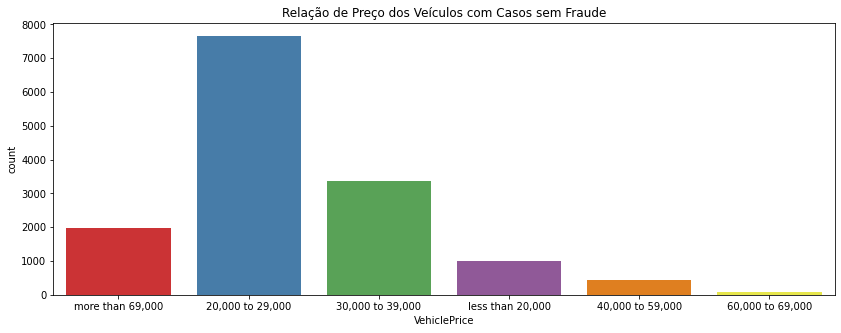

In [69]:
plt.figure(figsize = (14,5))
plt.title("Relação de Preço dos Veículos com Casos sem Fraude")
sns.countplot(x=df_nofraud['VehiclePrice'], data=df_nofraud, palette='Set1')

<AxesSubplot:title={'center':'Relação de Casos Não Fradulentos por Mês'}, xlabel='MonthClaimed', ylabel='count'>

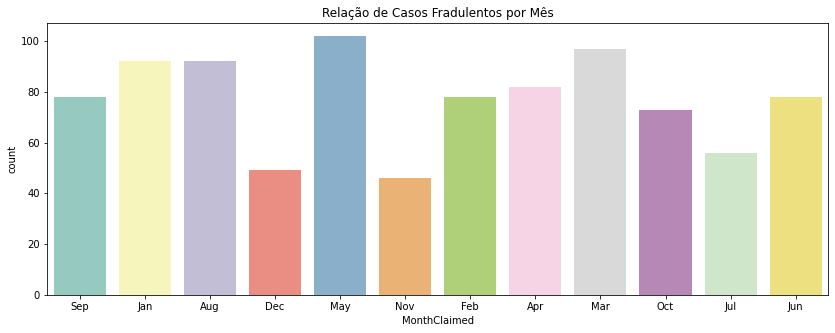

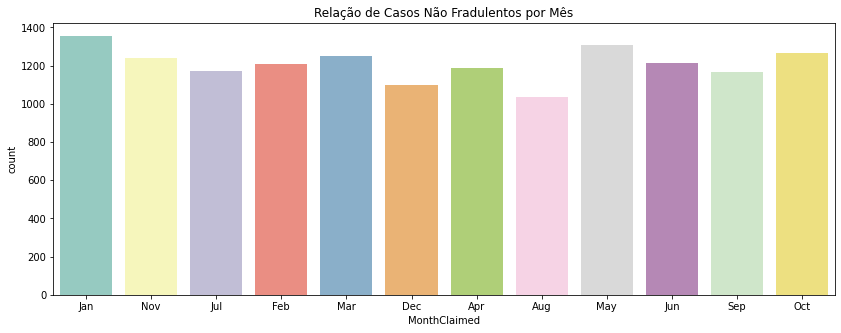

In [87]:
#Em valores gerais, há mais semelhanças, mas na cateroia mais que 69 mil, casos fraudulentos tem proporcionalmente mais ocorrências do que comparado com casos sem fraude
#Agora, vamos buscar relação entre mês do ano
plt.figure(figsize = (14,5))
plt.title("Relação de Casos Fradulentos por Mês")
sns.countplot(x=df_fraud['MonthClaimed'], data=df_fraud, palette='Set3')
plt.figure(figsize = (14,5))
plt.title("Relação de Casos Não Fradulentos por Mês")
sns.countplot(x=df_nofraud['MonthClaimed'], data=df_nofraud, palette='Set3')

In [ ]:
#Casos fraudulentos apresentam quedas no final de ano e maiores variações, enquanto sinistros possuem uma distribuição mais uniforme

In [65]:
df_clean.head(50)

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,PolicyNumber,RepNumber,Deductible,DriverRating,Days:Policy-Accident,Days:Policy-Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,"more than 69,000",1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,"more than 69,000",2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,"more than 69,000",3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,"20,000 to 29,000",4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,"more than 69,000",5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No
5,Oct,4,Friday,Honda,Urban,Wednesday,Nov,1,Male,Single,20,Third Party,Sport - Collision,Sport,"more than 69,000",6,12,400,3,more than 30,more than 30,none,5 years,21 to 25,No,No,External,3 to 5,no change,1 vehicle,1994,Collision,No
6,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,36,Third Party,Sport - Collision,Sport,"more than 69,000",7,14,400,1,more than 30,more than 30,1,7 years,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,No
7,Nov,1,Friday,Honda,Urban,Tuesday,Mar,4,Male,Single,16,Policy Holder,Sport - Collision,Sport,"more than 69,000",8,1,400,4,more than 30,more than 30,1,new,16 to 17,No,No,External,none,no change,1 vehicle,1994,Collision,No
8,Dec,4,Saturday,Honda,Urban,Wednesday,Dec,5,Male,Single,30,Policy Holder,Sport - Collision,Sport,"more than 69,000",9,7,400,4,more than 30,more than 30,none,6 years,31 to 35,No,Yes,External,3 to 5,no change,1 vehicle,1994,Collision,No
9,Apr,3,Tuesday,Ford,Urban,Wednesday,Apr,3,Male,Married,42,Policy Holder,Utility - All Perils,Utility,"more than 69,000",10,7,400,1,more than 30,more than 30,2 to 4,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,1994,All Perils,No


<AxesSubplot:title={'center':'Relação de Casos Não Fradulentos por Idade do Veículo'}, xlabel='AgeOfVehicle', ylabel='count'>

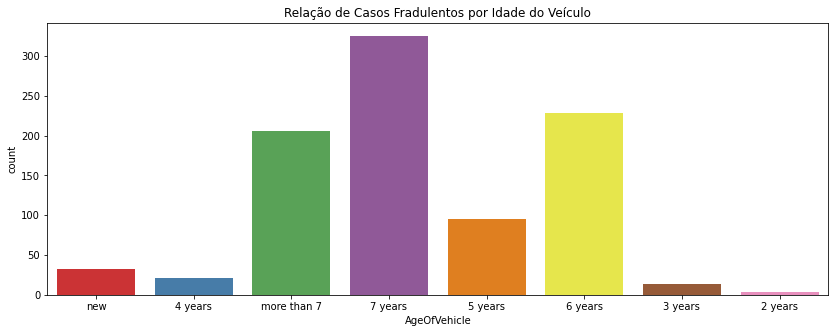

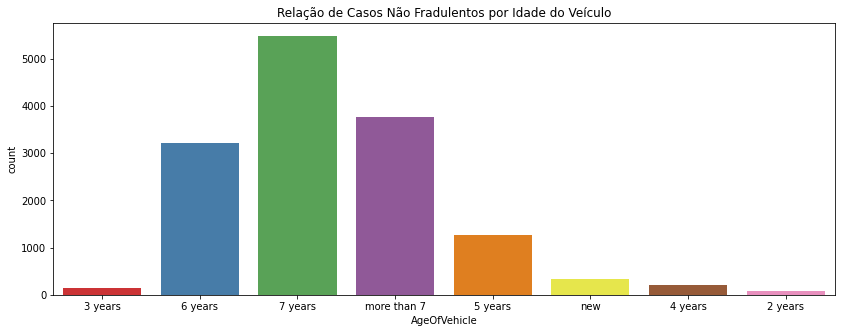

In [86]:
plt.figure(figsize = (14,5))
plt.title("Relação de Casos Fradulentos por Idade do Veículo")
sns.countplot(x=df_fraud['AgeOfVehicle'], data=df_fraud, palette='Set1')
plt.figure(figsize = (14,5))
plt.title("Relação de Casos Não Fradulentos por Idade do Veículo")
sns.countplot(x=df_nofraud['AgeOfVehicle'], data=df_nofraud, palette='Set1')

In [ ]:
#Sem relação de idade do veículo com casos de fraude

<AxesSubplot:title={'center':'Relação de Casos Não Fradulentos por Culpado pelo Incidente'}, xlabel='Fault', ylabel='count'>

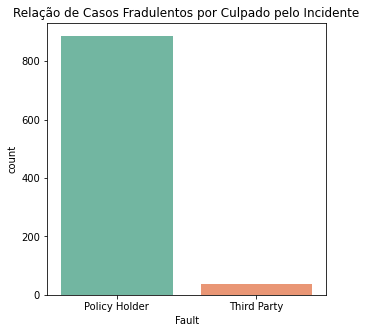

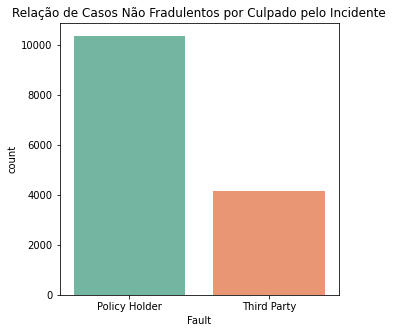

In [85]:
#Buscando relação de fraude pela coluna Fault
plt.figure(figsize = (5,5))
plt.title("Relação de Casos Fradulentos por Culpado pelo Incidente")
sns.countplot(x=df_fraud['Fault'], data=df_fraud, palette='Set2')
plt.figure(figsize = (5,5))
plt.title("Relação de Casos Não Fradulentos por Culpado pelo Incidente")
sns.countplot(x=df_nofraud['Fault'], data=df_nofraud, palette='Set2')

In [ ]:
#Verificado que casos não fraudelentos possuem uma quantidade proporcionalmente maior de Third Party envolvidos. Ou seja, quando há terceiros, a chance de fraude cai consideravelmente